In [1]:
import os
from scipy.spatial import distance
import numpy as np
from scipy.cluster.vq import kmeans
from itertools import product, permutations

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import simple_gensim

from time import time
from sklearn.metrics import homogeneity_completeness_v_measure

from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [2]:
def k_mean_clustering(data, lexicon, k):
    centroids = kmeans(data,k_or_guess=k, iter=1000)
    centroids_reps = np.tile(np.expand_dims(centroids[0], 0), (data.shape[0], 1, 1))
    embeddings_normal_reps = np.tile(np.expand_dims(data, 1), (1, centroids[0].shape[0], 1))
    clusters = np.argmin(np.sum((centroids_reps-embeddings_normal_reps)**2, 2),1)
    print(centroids[1])
    for i in range(k):
        print('k =', i)
        print([w for w in lexicon[clusters == i]])
        
    return clusters

In [3]:
root_dir = "models/relations"

In [4]:
rel_embeddings = np.load('{}/perplexity_vectors.npy'.format(root_dir))[None][0]
rel_words_contexts = np.load('{}/words_contexts.npy'.format(root_dir))

rel_embeddings_lm = np.load('{}/embeddings.npy'.format(root_dir))[None][0]
rel_spatial_lexicon = np.load('{}/spatial_lexicon.npy'.format(root_dir))
re_embeddings_lm_dict = dict(zip(rel_spatial_lexicon,rel_embeddings_lm))

In [5]:
rel_embeddings_lm.shape, rel_embeddings.shape

((42, 300), (42, 42))

In [6]:
for k in [2, 10, 20, 30]:
    print('word embeddings:')
    clusters_lm = k_mean_clustering(rel_embeddings_lm, rel_spatial_lexicon, k)
    print('='*50)
    print('distributional representation:')
    clusters_pp = k_mean_clustering(rel_embeddings, rel_words_contexts[0], k)

    print(homogeneity_completeness_v_measure(clusters_pp,clusters_lm), homogeneity_completeness_v_measure(clusters_lm,clusters_pp))


word embeddings:
3.79779
k = 0
['on_front_of', 'to', 'on_side_of', 'alongside', 'along', 'on_bottom_of', 'from', 'on', 'across', 'front', 'outside', 'at', 'inside', 'through', 'in', 'down', 'into', 'at_top_of', 'against', 'on_back_of', 'on_top_of']
k = 1
['with', 'right_of', 'above', 'next', 'under', 'in_back_of', 'to_right_of', 'below', 'next_to', 'without', 'beneath', 'around', 'in_front_of', 'to_left_of', 'between', 'by', 'behind', 'underneath', 'beside', 'over', 'near']
distributional representation:
2330.15818046
k = 0
['between', 'on_top_of', 'to_right_of', 'underneath', 'by', 'beneath', 'against', 'across', 'in_back_of', 'below', 'on_side_of', 'over', 'beside', 'under', 'to', 'next_to', 'from', 'at', 'behind', 'to_left_of', 'inside', 'in', 'in_front_of', 'around', 'with', 'on', 'front', 'near', 'next', 'above']
k = 1
['alongside', 'down', 'on_front_of', 'outside', 'on_bottom_of', 'without', 'into', 'along', 'right_of', 'at_top_of', 'on_back_of', 'through']
(0.037690390679594329,

In [7]:
logan_sadler_vecs = np.load('logan_sadler.npy')[None][0]
logan_sadler_vecs = {
    w.split('_')[0]: vec
    for w, vec in logan_sadler_vecs.items()
}
embeddings_ls = (np.array(list(logan_sadler_vecs.values())).reshape(10,49)-1)/8
spatial_lexicon_ls = np.array(list(logan_sadler_vecs.keys()))

In [8]:
k_mean_clustering(embeddings_ls, spatial_lexicon_ls, 6)

0.192251677888
k = 0
['left']
k = 1
['below', 'under']
k = 2
['away', 'far']
k = 3
['next', 'near']
k = 4
['above', 'over']
k = 5
['right']


array([4, 1, 4, 1, 0, 5, 3, 2, 3, 2])

In [9]:
root_dir = "models/visual_genome_phrases"

In [10]:
embeddings_lm = np.load('{}/embeddings.npy'.format(root_dir))[None][0]
spatial_lexicon = np.load('{}/spatial_lexicon.npy'.format(root_dir))
embeddings = np.load('{}/perplexity_vectors.npy'.format(root_dir))[None][0]
words_contexts = np.load('{}/words_contexts.npy'.format(root_dir))

#contexts_filter = sorted([w for w in buckets if len(buckets[w])>100])
#words_filter = sorted([w for w in buckets if len(buckets[w])>100])

words = np.array(list(words_contexts[0]))
contexts = np.array(list(words_contexts[1]))


In [11]:
clusters_lm = k_mean_clustering(embeddings_lm, spatial_lexicon, 20)

3.14564
k = 0
['right', 'left']
k = 1
['upward']
k = 2
['outside']
k = 3
['off']
k = 4
['around']
k = 5
['next']
k = 6
['underneath', 'beneath', 'below', 'under']
k = 7
['apart']
k = 8
['alongside']
k = 9
['sideways']
k = 10
['backwards']
k = 11
['among']
k = 12
['between']
k = 13
['away']
k = 14
['within']
k = 15
['before', 'the', 'with', 'out', 'after', 'up', 'in', 'above', 'together', 'side', 'through', 'top', 'here', 'down', 'beside', 'bottom', 'on', 'without', 'near', 'of', 'there', 'by', 'along', 'over', 'from', 'toward', 'against', 'behind', 'across', 'onto', 'into', 'inside', 'to']
k = 16
['about']
k = 17
['during']
k = 18
['at']
k = 19
['back', 'front']


In [12]:
glove_visual_genome = simple_gensim.KeyedVectors.load_word2vec_format('vg.vec.txt')
embeddings_glove = np.array([
    glove_visual_genome[w]
    for w in spatial_lexicon
])

In [13]:
clusters_glove = k_mean_clustering(embeddings_glove, spatial_lexicon, 20)

3.83925
k = 0
['off']
k = 1
['from']
k = 2
['apart']
k = 3
['between']
k = 4
['underneath', 'beneath', 'below', 'under']
k = 5
['over']
k = 6
['by']
k = 7
['top']
k = 8
['about', 'sideways', 'after', 'up', 'together', 'through', 'down', 'without', 'upward', 'backwards', 'during', 'toward', 'onto']
k = 9
['in']
k = 10
['out']
k = 11
['away']
k = 12
['across']
k = 13
['with', 'outside', 'around', 'here', 'beside', 'next', 'near', 'there', 'at', 'against', 'behind', 'inside']
k = 14
['above']
k = 15
['the', 'on', 'of']
k = 16
['before', 'within', 'alongside', 'among']
k = 17
['side', 'right', 'back', 'bottom', 'left', 'front', 'to']
k = 18
['into']
k = 19
['along']


In [14]:
glove_42B = simple_gensim.KeyedVectors.load_word2vec_format('/home/librarian/pretrained/glove.42B.300d.txt')
embeddings_glove2 = np.array([
    glove_42B[w]
    for w in spatial_lexicon
])

In [15]:
clusters_glove2 = k_mean_clustering(embeddings_glove2, spatial_lexicon, 20)

2.84805
k = 0
['near']
k = 1
['apart', 'together', 'alongside']
k = 2
['about']
k = 3
['underneath', 'beneath', 'beside', 'inside']
k = 4
['against']
k = 5
['onto']
k = 6
['at']
k = 7
['under']
k = 8
['by']
k = 9
['from']
k = 10
['next']
k = 11
['above', 'below']
k = 12
['top', 'bottom']
k = 13
['in', 'here', 'right', 'there']
k = 14
['before', 'the', 'with', 'after', 'without', 'of', 'during', 'into', 'to']
k = 15
['away', 'out', 'up', 'down', 'back', 'left', 'toward', 'off', 'behind']
k = 16
['side', 'front']
k = 17
['outside', 'within', 'around', 'through', 'between', 'along', 'over', 'across', 'among']
k = 18
['sideways', 'upward', 'backwards']
k = 19
['on']


In [16]:
buckets = np.load('{}/buckets.npy'.format(root_dir))[None][0]
buckets = {
    rel: len(buckets[rel])
    for rel in buckets
}

In [38]:
composit_simple = np.load('{}/composit2simple.npy'.format(root_dir))
composit_simple = composit_simple.T
simple_classes_set = list(set(composit_simple[:,1]))
simple_classes = {
    composit: simple_classes_set.index(simple)
    for composit,simple in composit_simple
}

simple2composit = {
    rel: [composit for composit,simple in composit_simple if rel == simple]
    for rel in simple_classes_set
}

composit2simple = {
    composit: simple
    for composit,simple in composit_simple
}

# the order in following list matters for coloring the results
simple_classes_set2 = [
    #'next', 'side', 'beside', 'near',
    'by','with',
    'left', 'right',
#    'before', 'after',
    'behind',
    'back', 'front',
    'below', 'under', 
    'over', 'above',
    'to', 'at', 
    'away', 'apart', 'without',
#    'off',
#    'against',
#    'from',
#    'together', 'among',
#    'alongside', 
#    'along', 'across','during', 
#    'sideways', 
    'between', 'within', 'through', 
#    'around', 'about',
#   'inside', 'into', 
#    'onto', 
    'underneath', 'beneath',
    'out', 'outside',
    'in',
    'on',
#    'up', 'top', 'down', 'bottom',
#    'upward', 'toward', 'backward', 
#    'here', 'there',
]

non_relations = ['left', 'right', 'front', 'back', ]

word_filter = [
    w 
    for simple in simple_classes_set2 
    for w in simple2composit[simple] 
    if w not in non_relations
    if w in buckets and buckets[w] > 100
]


In [35]:
context_filter = [
    'to the left of', 'to the right of',
    'in front of', 'behind'
    'above', 'below', 
    'over', 'under',
    'on',
    'in',
    'next to',
    'with',
    'between' 
]
#context_filter = [w for w in buckets if buckets[w]>100]

In [202]:
embeddings = np.load('{}/perplexity_vectors.npy'.format(root_dir))[None][0]
words_contexts = np.load('{}/words_contexts.npy'.format(root_dir))

#contexts_filter = sorted([w for w in buckets if len(buckets[w])>100])
#words_filter = sorted([w for w in buckets if len(buckets[w])>100])

words = np.array(list(words_contexts[0]))
contexts = np.array(list(words_contexts[1]))

embedding_dimensions = [np.where(contexts == w)[0][0] for w in word_filter if w in contexts]
#embedding_dimensions = [np.where(contexts == w)[0][0] for w in context_filter if w in contexts]
#embedding_indices = [np.where(words == w)[0][0] for w in word_filter if w in words]
embedding_indices = [np.where(words == w)[0][0] for w in words if w in word_filter]

words = words[embedding_indices]
contexts = contexts[embedding_dimensions]

embeddings = embeddings[embedding_indices][:,embedding_dimensions]
# lower bound norm
embeddings_normal = embeddings/np.expand_dims(np.sum(embeddings, 0),0)
#embeddings_normal = embeddings/np.expand_dims(np.linalg.norm(embeddings_normal, axis=0),0)
# unit vector norm for clustering
embeddings_normal2 = embeddings_normal / np.expand_dims(np.linalg.norm(embeddings_normal, axis=1),1)

In [203]:
words.shape

(29,)

In [204]:
contextual_weights = [buckets[c] for c in contexts]
contextual_weights = [-np.log2(buckets[c])+np.log2(sum(contextual_weights)) for c in contexts]

In [205]:
embeddings_normal3 = embeddings / (2**np.expand_dims(contextual_weights, 0))
embeddings_normal3 = embeddings_normal3/np.expand_dims(np.sum(embeddings_normal3, 0),0)
embeddings_normal3 = embeddings_normal3 / np.expand_dims(np.linalg.norm(embeddings_normal3, axis=1),1)

In [206]:
embeddings_normal3

array([[ 0.21463088,  0.19127098,  0.19504993,  0.19796943,  0.13705493,
         0.08077939,  0.14659578,  0.11892724,  0.11617009,  0.06120753,
         0.14383695,  0.1716717 ,  0.06406358,  0.17644238,  0.19051914,
         0.21052973,  0.18176137,  0.23384015,  0.25147733,  0.1764968 ,
         0.18060159,  0.17673557,  0.23755532,  0.17997794,  0.1774189 ,
         0.29817983,  0.24538566,  0.19553052,  0.20564156],
       [ 0.19759079,  0.19184705,  0.16026129,  0.16963098,  0.14335344,
         0.10828865,  0.18089402,  0.17731746,  0.12962035,  0.10041819,
         0.15893886,  0.169429  ,  0.07856677,  0.16132098,  0.17953278,
         0.21567862,  0.17379189,  0.18118934,  0.24612597,  0.14486725,
         0.18063688,  0.17499638,  0.25533989,  0.15886139,  0.16009765,
         0.32141466,  0.21788268,  0.25490646,  0.20439827],
       [ 0.19573987,  0.19211357,  0.16180508,  0.17087656,  0.14396087,
         0.10730315,  0.18323562,  0.17993272,  0.13610129,  0.09990813,
  

In [207]:
clusters = k_mean_clustering(embeddings_normal2, words, 10)

0.0838193516031
k = 0
['on']
k = 1
['in back of', 'to the left of', 'to the right of', 'in the back of', 'in front of']
k = 2
['above', 'over']
k = 3
['through', 'outside', 'out']
k = 4
['beneath', 'below', 'under', 'underneath']
k = 5
['behind', 'in between', 'between', 'by']
k = 6
['in', 'to', 'at']
k = 7
['back of']
k = 8
['on the front of', 'on back of', 'on front of', 'on the back of']
k = 9
['with', 'without']


In [208]:
words_a = sorted(words)
#words_a = [
#    w
#    for i in range(k)
#    for w in words[embedding_indices][clusters == i]
#]
contexts_a = sorted(contexts)
#contexts_a = list(set(words_contexts2[1]))
#contexts_a =['on', 'in', 'in front of', 'next to', 'at', 'to']
#words_a =['on', 'in', 'in front of', 'next to', 'at', 'to']
embedding_indices = [np.where(words == w)[0][0] for w in words_a]
embedding_dimensions = [np.where(contexts == w)[0][0] for w in contexts_a]

In [209]:
data = embeddings_normal2[embedding_indices][:,embedding_dimensions]
#data = data / np.expand_dims(np.sum(data, 1),1)

In [210]:
def plot_matrix(data, contexts_a, words_a, filename=None):
    fig, ax = plt.subplots()
    fig = plt.gcf()
    fig.set_size_inches(8, 11)
    heatmap = ax.pcolor(data, cmap=matplotlib.cm.BuPu_r, alpha=0.8)

    ax.set_frame_on(False)
    ax.set_xticks(np.arange(len(contexts_a)) + 0.5, minor=False)
    ax.set_yticks(np.arange(len(words_a)) + 0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.xaxis.tick_top()

    ax.set_xticklabels([''+w+' (contexts)' for w in contexts_a], minor=False)
    ax.set_yticklabels([w for w in words_a], minor=False)
    plt.xticks(rotation=90)

    #for y in range(data.shape[0]):
    #    for x in range(data.shape[1]):
    #        plt.text(x + 0.5, y + 0.5, '{:.1f}'.format(data[y, x]),
    #                 horizontalalignment='center',
    #                 verticalalignment='center',
    #                 fontsize='4',
    #                 alpha=0.8,
    #                 )

    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

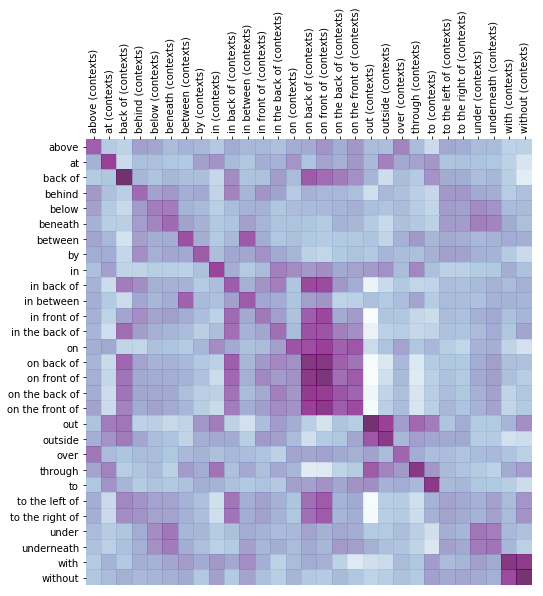

In [211]:
plot_matrix(data, contexts_a, words_a, 'overall_matrix.pdf')

In [217]:
contexts_a

['above',
 'at',
 'back of',
 'behind',
 'below',
 'beneath',
 'between',
 'by',
 'in',
 'in back of',
 'in between',
 'in front of',
 'in the back of',
 'on',
 'on back of',
 'on front of',
 'on the back of',
 'on the front of',
 'out',
 'outside',
 'over',
 'through',
 'to',
 'to the left of',
 'to the right of',
 'under',
 'underneath',
 'with',
 'without']

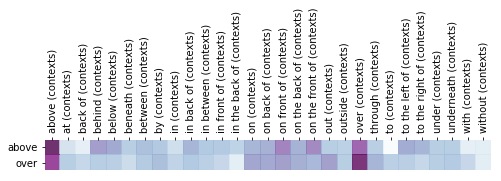

In [222]:
plot_matrix(
    data[[np.where(np.array(sorted(words)) == w)[0][0] for w in ['above', 'over']]][:,[np.where(np.array(sorted(contexts)) == w)[0][0] for w in contexts_a]],
    contexts_a,
    ['above', 'over'],
    'above-over.pdf'
)

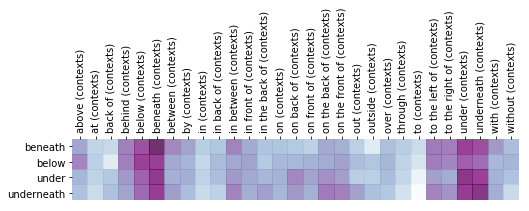

In [224]:
plot_matrix(
    data[[np.where(np.array(sorted(words)) == w)[0][0] for w in ['beneath', 'below', 'under', 'underneath']]][:,[np.where(np.array(sorted(contexts)) == w)[0][0] for w in contexts_a]],
    contexts_a,
    ['beneath', 'below', 'under', 'underneath'],
    'under-below.pdf'
)

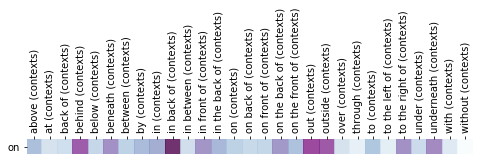

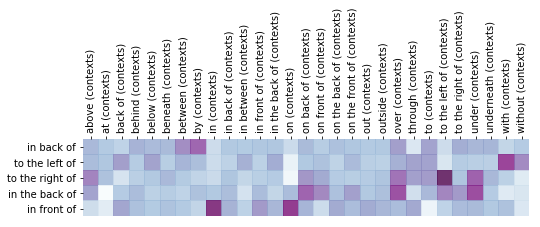

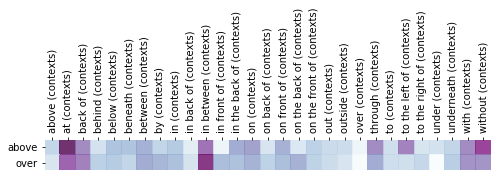

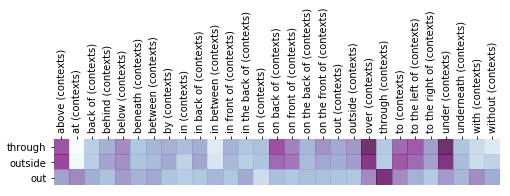

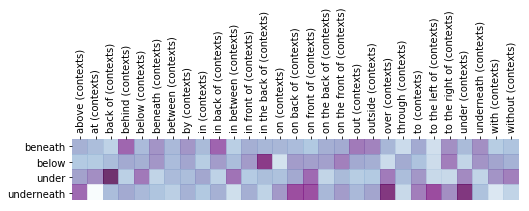

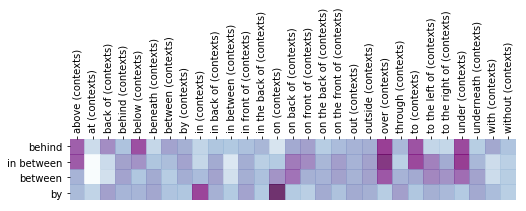

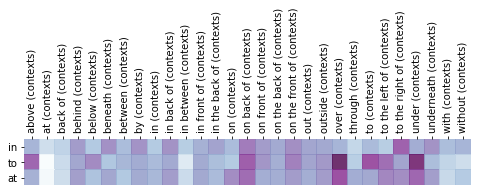

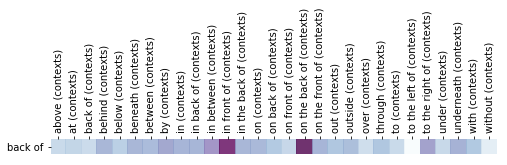

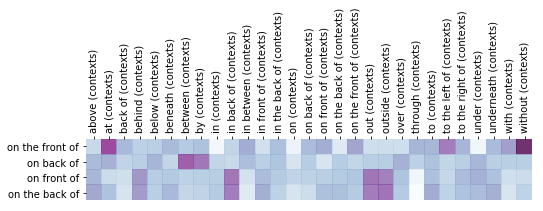

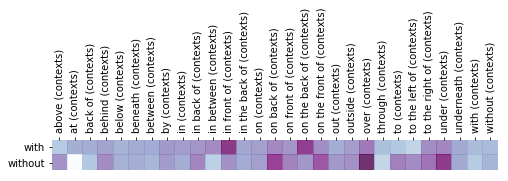

In [213]:
k=10
for i in range(k):
    words_a = words[clusters == i]
    plot_matrix(
        data[[np.where(words == w)[0][0] for w in words_a]][:,[np.where(contexts == w)[0][0] for w in contexts_a]],
        contexts_a,
        words_a,
    )

In [ ]:
simple_classification = [simple_classes[w] for w in words]

In [ ]:
homogeneity_completeness_v_measure(simple_classification, clusters)

In [ ]:
for i in range(k):
    words_a = words[clusters == i]
    #print(i, words_a)
    words_a = [w for w in words_a if simple_classes_set[simple_classes[w]] in simple_classes_set2]
    print(i, [simple_classes_set[simple_classes[w]] for w in words_a])
    

In [ ]:
def visualise_embeddings(X, y):
    # Scale and visualize the embedding vectors
    def plot_embedding(X, title=None):
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = (X - x_min) / (x_max - x_min)
        plt.figure()
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            if simple_classes_set[simple_classes[y[i]]] not in simple_classes_set2:
                continue
            plt.text(X[i, 0], X[i, 1], y[i],
                     color=plt.cm.tab20(simple_classes_set2.index(simple_classes_set[simple_classes[y[i]]])/len(simple_classes_set2)),
                     fontdict={
                         #'weight': 'bold',
                         'size': 8
                     }
                    )
            plt.scatter(X[i, 0], X[i, 1], #y[i],
                     color=plt.cm.tab20(simple_classes_set2.index(simple_classes_set[simple_classes[y[i]]])/len(simple_classes_set2)),
                    )


        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title)


    # t-SNE embedding of the digits dataset
    print("Computing t-SNE embedding")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    X_tsne = tsne.fit_transform(X)

    plot_embedding(X_tsne,
                   "t-SNE embedding of the digits (time %.2fs)" %
                   (time() - t0))

    plt.show()

    n_neighbors = 4

    print("Computing Isomap embedding")
    t0 = time()
    X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
    print("Done.")
    plot_embedding(X_iso,
                   "Isomap projection of the digits (time %.2fs)" %
                   (time() - t0))


    print("Computing Totally Random Trees embedding")
    hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                           max_depth=5)
    t0 = time()
    X_transformed = hasher.fit_transform(X)
    pca = decomposition.TruncatedSVD(n_components=2)
    X_reduced = pca.fit_transform(X_transformed)

    plot_embedding(X_reduced,
                   "Random forest embedding of the digits (time %.2fs)" %
                   (time() - t0))
    

visualise_embeddings(X = embeddings_normal2, y = np.array(words))
#y = np.array([simple_classes_set[simple_classes[w]] for w in words])

In [117]:
# intrinsic evaluations:
dimensions = [
    ('left', 'right'),
    ('above', 'below'),
    #('over', 'under'),
    #('above', 'under'),
    #('over', 'below'),
    ('front', 'back'),
    ('with', 'without'),
    ('in', 'out'),
    ('up', 'down'),
    #('upward', 'downward'),
    ('away', 'near'),
]
paris = [
    (w1, w2)
    for d in dimensions
    for w1, w2 in product(d, d)
    if w1 != w2 
]

test_suit1 = list({
    test
    for pair1, pair2 in product(paris,paris)
    for test in [(pair1[0], pair1[1], pair2[0], pair2[1]), (pair1[1], pair1[0], pair2[1], pair2[0])]
    if pair1[0] not in pair2
    if pair1[1] not in pair2
})

test_suit2 = list({
    (w_alt1,w_alt2,w_alt3,w4,)
    for w1,w2,w3,w4 in test_suit1
    for w_alt1 in simple2composit[w1]
    for w_alt2 in simple2composit[w2]
    for w_alt3 in simple2composit[w3]
})

test_suit1_lexicon = set(w for test in test_suit1 for w in test)
test_suit2_lexicon = set(w for test in test_suit2 for w in test)

In [118]:
set([composit2simple[w] for q in results2_inspect for w in q])

{'above',
 'back',
 'below',
 'front',
 'in',
 'left',
 'out',
 'right',
 'with',
 'without'}

In [119]:
len(test_suit1), len(test_suit2), len(test_suit1_lexicon), len(test_suit2_lexicon)

(168, 90580, 14, 98)

In [120]:
def analogy(pos, neg, embeddings, lexicon, lexicon_filter=None):
    exclude_filter = [w for w in pos]+[w for w in neg]
    if lexicon_filter is not None:
        exclude_filter = set(exclude_filter+list(set(lexicon)-set(lexicon_filter)))
    
    vec = np.sum([embeddings[lexicon == w] for w in pos],0) - np.sum([embeddings[lexicon == w] for w in neg],0)
    vec = vec.flatten()
    vec = vec/np.linalg.norm(vec)
    vec = np.expand_dims(vec, 1)
    results = lexicon[np.argsort(np.dot(embeddings, vec).flatten())][::-1] 
    for w in exclude_filter:
        results = results[results != w]
    return results[0]

In [121]:
analogy(['to the left of', 'over'], ['to the right of'], embeddings_normal3, words)


'above'

In [122]:
analogy(['left', 'over'], ['right'], embeddings_glove, spatial_lexicon)


'above'

In [123]:
results = [
    analogy([w1, w3], [w2], embeddings_glove, spatial_lexicon, test_suit1_lexicon) == w4
    for w1,w2,w3,w4 in test_suit1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(results),len(results), sum(results)/len(results)

(61, 168, 0.3630952380952381)

In [124]:
len(set(spatial_lexicon)-(set(spatial_lexicon)-set([w for d in dimensions for w in d])))

14

In [125]:
set([w for d in dimensions for w in d])-set(spatial_lexicon)

set()

In [126]:
results_inspect = np.array([
    (w1,w2,w3,w4)
    for w1,w2,w3,w4 in test_suit1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
])[results]
results_inspect

array([['near', 'away', 'back', 'front'],
       ['above', 'below', 'right', 'left'],
       ['near', 'away', 'left', 'right'],
       ['out', 'in', 'up', 'down'],
       ['near', 'away', 'out', 'in'],
       ['down', 'up', 'right', 'left'],
       ['front', 'back', 'below', 'above'],
       ['with', 'without', 'right', 'left'],
       ['out', 'in', 'below', 'above'],
       ['up', 'down', 'back', 'front'],
       ['front', 'back', 'right', 'left'],
       ['up', 'down', 'out', 'in'],
       ['without', 'with', 'left', 'right'],
       ['below', 'above', 'front', 'back'],
       ['left', 'right', 'down', 'up'],
       ['away', 'near', 'down', 'up'],
       ['up', 'down', 'right', 'left'],
       ['below', 'above', 'up', 'down'],
       ['in', 'out', 'right', 'left'],
       ['down', 'up', 'without', 'with'],
       ['below', 'above', 'right', 'left'],
       ['away', 'near', 'left', 'right'],
       ['down', 'up', 'back', 'front'],
       ['above', 'below', 'left', 'right'],
       ['i

In [127]:
results_glov2 = [
    analogy([w1, w3], [w2], embeddings_glove2, spatial_lexicon, test_suit1_lexicon) == w4
    for w1,w2,w3,w4 in test_suit1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(results_glov2),len(results_glov2), sum(results_glov2)/len(results_glov2)

(78, 168, 0.4642857142857143)

In [128]:
results_lm = [
    analogy([w1, w3], [w2], embeddings_lm, spatial_lexicon, test_suit1_lexicon) == w4
    for w1,w2,w3,w4 in test_suit1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(results_lm),len(results_lm), sum(results_lm)/len(results_lm)

(122, 168, 0.7261904761904762)

In [112]:
sum(results_lm), len(results_lm)

(73, 80)

In [113]:
results_inspect_lm = np.array([
    (w1,w2,w3,w4)
    for w1,w2,w3,w4 in test_suit1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
])[results_lm]
results_inspect_lm

array([['out', 'in', 'left', 'right'],
       ['below', 'above', 'in', 'out'],
       ['without', 'with', 'in', 'out'],
       ['right', 'left', 'out', 'in'],
       ['out', 'in', 'back', 'front'],
       ['right', 'left', 'without', 'with'],
       ['back', 'front', 'above', 'below'],
       ['above', 'below', 'with', 'without'],
       ['back', 'front', 'with', 'without'],
       ['above', 'below', 'back', 'front'],
       ['with', 'without', 'left', 'right'],
       ['right', 'left', 'in', 'out'],
       ['in', 'out', 'right', 'left'],
       ['above', 'below', 'right', 'left'],
       ['above', 'below', 'front', 'back'],
       ['with', 'without', 'below', 'above'],
       ['in', 'out', 'with', 'without'],
       ['right', 'left', 'with', 'without'],
       ['below', 'above', 'back', 'front'],
       ['in', 'out', 'back', 'front'],
       ['below', 'above', 'right', 'left'],
       ['in', 'out', 'below', 'above'],
       ['back', 'front', 'out', 'in'],
       ['below', 'above', 'wi

In [114]:
results2 = [
    composit2simple[analogy([w1, w3], [w2], embeddings_normal2, words, test_suit2_lexicon)] == w4
    for w1,w2,w3,w4 in test_suit2
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]
sum(results2),len(results2), sum(results2)/len(results2)

(177, 216, 0.8194444444444444)

In [115]:
results2_inspect = np.array([
    (w1,w2,w3,w4)
    for w1,w2,w3,w4 in test_suit2
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
])[results2]
results2_inspect

array([['on front of', 'on the back of', 'out', 'in'],
       ['in the back of', 'on front of', 'out', 'in'],
       ['back of', 'in front of', 'out', 'in'],
       ['in front of', 'in back of', 'above', 'below'],
       ['in the back of', 'on front of', 'below', 'above'],
       ['to the left of', 'to the right of', 'below', 'above'],
       ['on back of', 'in front of', 'with', 'without'],
       ['in the back of', 'on front of', 'with', 'without'],
       ['to the left of', 'to the right of', 'with', 'without'],
       ['on front of', 'in the back of', 'out', 'in'],
       ['back of', 'on the front of', 'below', 'above'],
       ['on back of', 'on the front of', 'out', 'in'],
       ['on the front of', 'in the back of', 'without', 'with'],
       ['on back of', 'on front of', 'in', 'out'],
       ['in front of', 'in the back of', 'with', 'without'],
       ['in back of', 'on front of', 'above', 'below'],
       ['in the back of', 'in front of', 'in', 'out'],
       ['on front of', '

In [129]:
results2_1 = [
    analogy([w1, w3], [w2], embeddings_normal2, words, test_suit1_lexicon) == w4
    for w1,w2,w3,w4 in test_suit1
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]
sum(results2_1),len(results2_1),sum(results2_1)/len(results2_1)

(20, 24, 0.8333333333333334)

In [130]:
results2_random = [
    np.random.choice(list(set(test_suit1_lexicon)-set([w1, w2, w3]))) == w4
    for w1,w2,w3,w4 in test_suit1
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]
sum(results2_random),len(results2_random), sum(results2_random)/len(results2_random)

(1, 24, 0.041666666666666664)

In [131]:
1/(len(test_suit1_lexicon)-3)

0.09090909090909091

In [132]:
results2_random = [
    np.random.choice(list(set(test_suit2_lexicon)-set([composit2simple[w1],composit2simple[w2],composit2simple[w3]]))) == composit2simple[w4]
    for w1,w2,w3,w4 in test_suit2
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]
sum(results2_random)/len(results2_random)

0.009259259259259259

In [133]:
words_ls = np.array(list(logan_sadler_vecs.keys()))
embs_ls = (np.array(list(logan_sadler_vecs.values())).reshape(10, 49)-1)/8
results3 = [
    analogy([w1, w3], [w2], embs_ls, words_ls, test_suit1_lexicon) == w4
    for w1,w2,w3,w4 in test_suit1
    if w1 in words_ls
    if w2 in words_ls
    if w3 in words_ls
    if w4 in words_ls
]
sum(results3)/len(results3)

0.16666666666666666

In [134]:
results3_inspect = np.array([
    (w1,w2,w3,w4)
    for w1,w2,w3,w4 in test_suit1
    if w1 in words_ls
    if w2 in words_ls
    if w3 in words_ls
    if w4 in words_ls
])[results3]
results3_inspect

array([['right', 'left', 'near', 'away'],
       ['above', 'below', 'near', 'away'],
       ['below', 'above', 'near', 'away'],
       ['left', 'right', 'near', 'away']],
      dtype='<U5')

In [135]:
# intrinsic evaluations:
dimensions_odd = [
    ('left', 'right'),
    ('above', 'over', 'under', 'below'),
    ('front', 'back'),
    ('in', 'out'), 
    ('away', 'near'),
]

odd_ones_1 = list({
    tuple(list(p)+[w])
    for d1 in dimensions_odd
    for d2 in dimensions_odd
    for w in d2
    for w1 in d1
    for w2 in d1
    for p in permutations([w1, w2, w])
    if w1 != w2
    if d1 != d2
})

odd_ones_2 = list({
    (w_alt1,w_alt2,w_alt3, w_alt1 if w4==w1 else w_alt2 if w4==w2 else w_alt3 ,)
    for w1,w2,w3,w4 in odd_ones_1
    for w_alt1 in simple2composit[w1]
    for w_alt2 in simple2composit[w2]
    for w_alt3 in simple2composit[w3]
})

odd_ones_1_lexicon = set(w for test in odd_ones_1 for w in test)
odd_ones_2_lexicon = set(w for test in odd_ones_2 for w in test)

In [136]:
len(odd_ones_1), len(odd_ones_2)

(528, 251880)

In [137]:
def odd_one(items, embeddings, lexicon):
    vecs = [embeddings[lexicon == w] for w in items]
    
    distances = [
        (distance.cosine(vec1, vec2), i)
        for i, vec1 in enumerate(vecs)
        for j, vec2 in enumerate(vecs)
        if i < j
    ]
    
    results = sorted([
        (sum([d for d, i in distances if i == index]), w)
        for index, w in enumerate(items)
    ], reverse=True)
    
    return results[0][1]

In [144]:
o_results = [
    odd_one([w1, w2, w3], embeddings_glove, spatial_lexicon) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(o_results),len(o_results), sum(o_results)/len(o_results)

(178, 528, 0.3371212121212121)

In [145]:
o_results = [
    odd_one([w1, w2, w3], embeddings_glove2, spatial_lexicon) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(o_results),len(o_results), sum(o_results)/len(o_results)

(176, 528, 0.3333333333333333)

In [146]:
o_results = [
    odd_one([w1, w2, w3], embeddings_lm, spatial_lexicon) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(o_results),len(o_results), sum(o_results)/len(o_results)

(176, 528, 0.3333333333333333)

In [149]:
o_results2_1 = [
    odd_one([w1, w2, w3], embeddings_normal2, words) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]

sum(o_results2_1),len(o_results2_1), sum(o_results2_1)/len(o_results2_1)

(39, 96, 0.40625)

In [150]:
o_results2_2 = [
    odd_one([w1, w2, w3], embeddings_normal2, words) == w4
    for w1,w2,w3,w4 in odd_ones_2
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]

sum(o_results2_2),len(o_results2_2),sum(o_results2_2)/len(o_results2_2)

(537, 1320, 0.4068181818181818)

In [151]:
odd_ones_2[105]

('to right side of', 'by the back of', 'by left of', 'by the back of')

In [582]:
o_random1 = [
   np.random.choice([w1, w2, w3]) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]

sum(o_random1)/len(o_random1)

0.3390151515151515

In [583]:
o_random2 = [
    np.random.choice([w1, w2, w3]) == w4
    for w1,w2,w3,w4 in odd_ones_2
    if w1 in words
    if w2 in words
    if w3 in words
    if w4 in words
]
sum(o_random2)/len(o_random2)

0.06619087601455359

In [584]:
odd_ones_1[111]

('over', 'left', 'right', 'over')

In [148]:
o_results3 = [
    odd_one([w1, w2, w3], embs_ls, words_ls) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in words_ls
    if w2 in words_ls
    if w3 in words_ls
    if w4 in words_ls
]
sum(o_results3),len(o_results3), sum(o_results3)/len(o_results3)

(59, 216, 0.27314814814814814)

In [586]:
o_results4 = [
    odd_one([w1, w2, w3], embeddings_lm, spatial_lexicon) == w4
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
]

sum(o_results4)/len(o_results4)

0.3333333333333333

In [587]:
np.array([
    ([w1, w2, w3], w4)
    for w1,w2,w3,w4 in odd_ones_1
    if w1 in spatial_lexicon
    if w2 in spatial_lexicon
    if w3 in spatial_lexicon
    if w4 in spatial_lexicon
])[o_results4]

array([[list(['right', 'in', 'out']), 'right'],
       [list(['left', 'below', 'above']), 'left'],
       [list(['front', 'over', 'below']), 'front'],
       [list(['near', 'over', 'below']), 'near'],
       [list(['away', 'back', 'front']), 'away'],
       [list(['in', 'below', 'over']), 'in'],
       [list(['under', 'near', 'away']), 'under'],
       [list(['above', 'left', 'right']), 'above'],
       [list(['under', 'in', 'out']), 'under'],
       [list(['back', 'out', 'in']), 'back'],
       [list(['out', 'right', 'left']), 'out'],
       [list(['in', 'right', 'left']), 'in'],
       [list(['front', 'below', 'under']), 'front'],
       [list(['in', 'over', 'under']), 'in'],
       [list(['below', 'front', 'back']), 'below'],
       [list(['near', 'under', 'above']), 'near'],
       [list(['front', 'out', 'in']), 'front'],
       [list(['above', 'back', 'front']), 'above'],
       [list(['near', 'above', 'over']), 'near'],
       [list(['back', 'under', 'over']), 'back'],
       [li

0.0050861726053168521